# MohammadReza Javaheri
# 610300038

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

$$ \underset{x,y}{\min }\quad  x^2 + \frac{1}{k}y^2 $$

In [2]:
def F(point,k):
    A = np.matrix([[1,0],[0,k]])
    return point.transpose() * A * point

def Gradient(point , k):
    A = np.matrix([ [1,0] ,[0,k]])
    return 2 * A * point
    

# Backtracking Line Search for Step Size Determination
Given an objective function f(x) and a descent direction d, the backtracking line search method finds a suitable step size alpha.

1. Initialize parameters: 
   - $ s > 0$ (initial step size)
   - $ 0 < \beta < 1 $(reduction factor)
   - $ 0 < \alpha < 1 $(sufficient decrease factor)

2. Repeat until sufficient decrease condition:
   - Compute $ f(x + s * d)$
   - Check if $ f(x) - f(x - s * d) >= \alpha * s * ∇f(x)^T * d $
   - If condition holds, accept s
   - If not, reduce alpha: alpha = s * \beta

3. Return the final accepted step size alpha.


In [3]:
def Backtrack_search(point,k,alpha,beta,s):
    return s if F(point,k) - F(point - s * Gradient(point,k) ,k) >= alpha * s * norm(Gradient(point,k))**2 else Backtrack_search(point,k,alpha,beta,s*beta)

$$ x_{i+1} = x_i - stepSize * ∇f(x_i) $$

In [4]:
def gradient_method(k,e):
    point= np.matrix([(10,10)]).transpose()
    iteration=0
    while norm(Gradient(point,k)) > e:
        point = point - Backtrack_search(point , k , 0.5 , 0.5 , 1) * Gradient(point,k)
        iteration+=1
    return iteration

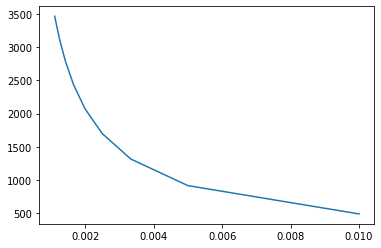

In [5]:
x = [0.01/i for i in range(1,10)]
y = [gradient_method(i,1e-5) for i in x]
plt.plot(x,y)